<a href="https://colab.research.google.com/github/Villagran29A/Polynomial-regression-on-nonlinear-data/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Underfitting vs. Overfitting


# Homework: Linear regression versus Polynomial regression
Villagran Saucedo Gabriel Aldair 

Undergraduate, 2017 generation, 267572, 201702370947

Dr. Cuevas Tello Juan Carlos

Aprendizaje Automatico (Machine Learning) 

3/02/2022                                     

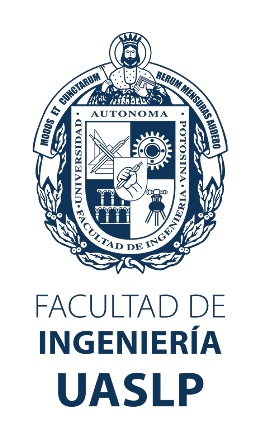


# Abstract
We made use of the Scikit-Learn example that show us how to work with non linear data, the objective of the homework is that we play with the degree of the polynomial to find the best degree of the polynomial and the MSE (Mean Squared Error) for the non linear data.
For this homework we use the .csv and .dat files that were provided by the profesor.

# Example of Scikit-Learn
Example that show us the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions.


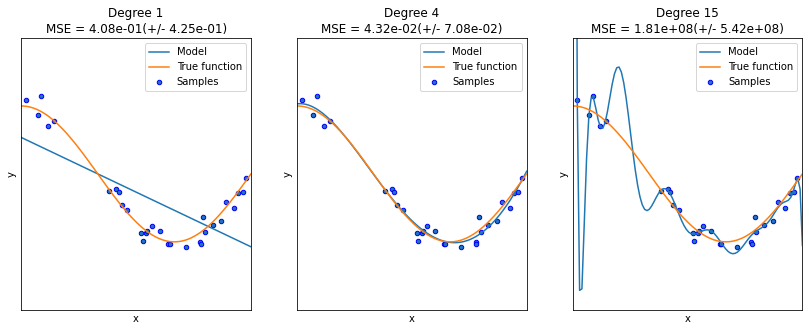

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

- Degree 1 = Underfitting
- Degree 4 = Best fitting
- Degree 15 = Overfitting

#Loading data from Drive
In this part I'm uploading my google drive files to colab, this will make the work easier, once I uploaded I show only the **ArtificialData directory, this one was provided by the profesor** just to see the files that are there

In [3]:
from google.colab import  drive
drive.mount('/content/drive/')
!ls "/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData"

Mounted at /content/drive/
DS-5-1-G-0-N-0_error_bars_0-106.eps    DS-5-1-GAP-1-1-N-1_v2.dat
DS-5-1-G-5-1-N-0_error_bars_0-466.eps  DS-5-1-GAP-5-1-N-3_v2.csv
DS-5-1-GAP-0-1-N-0_v2.csv	       DS-5-1-GAP-5-1-N-3_v2.dat
DS-5-1-GAP-0-1-N-0_v2.dat	       underlying_DS-5-1.jpg
DS-5-1-GAP-1-1-N-1_v2.csv


#Saving the Nonlinear data into variables

Here I'm loading *.dat file and assigning to each file variable, I made this for two reasons:

1-. Have the three files ready to use

2-. Have separated for each purpose 
- DS-5-1-GAP-0-1-N-0_v2.dat = MSE
- DS-5-1-GAP-1-1-N-1_v2.dat = Best polynomial model
- DS-5-1-GAP-5-1-N-3_v2.dat = Best polynomial model

In [4]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE1_dat = 'DS-5-1-GAP-0-1-N-0_v2.dat'
FILE2_dat = 'DS-5-1-GAP-1-1-N-1_v2.dat'
FILE3_dat = 'DS-5-1-GAP-5-1-N-3_v2.dat'
#Saving the data
data = pd.read_csv(DATA_PATH + FILE1_dat,header=None)
data2 = pd.read_csv(DATA_PATH + FILE2_dat,header=None)
data3 = pd.read_csv(DATA_PATH + FILE3_dat,header=None)
# Display the first five rows
#data.head()
#data2.head()
#data3.head()

Here I'm loading *.csv datasets and assigning to each file variable, I made this for two reasons:

1-. Have the three datasets ready to use

2-. Have separated for each purpose 
- DS-5-1-GAP-0-1-N-0_v2.csv = MSE
- DS-5-1-GAP-1-1-N-1_v2.csv = Best polynomial model
- DS-5-1-GAP-5-1-N-3_v2.csv = Best polynomial model

Text(0.5, 1.0, 'dataset: /content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/')

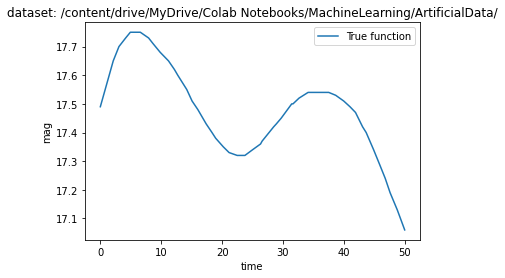

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE1_csv = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE2_csv = 'DS-5-1-GAP-1-1-N-1_v2.csv'
FILE3_csv= 'DS-5-1-GAP-5-1-N-3_v2.csv'
#Saving the FILE1 into d variable
d1 = pd.read_csv(DATA_PATH + FILE1_csv, header=None)
d2 = pd.read_csv(DATA_PATH + FILE2_csv, header=None)
d3 = pd.read_csv(DATA_PATH + FILE3_csv, header=None)
#plotting 
plt.plot(d1[0], d1[1], label="True function")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("dataset: "+ DATA_PATH)

In [6]:
# Display the first five rows
d1.head()

,0,1,2
0,0.00,17.49,17.04
1,2.12,17.65,17.17
2,3.06,17.70,17.24
3,4.16,17.73,17.33
4,4.93,17.75,17.39


In [ ]:
# Display the first five rows
d2.head()

In [ ]:
# Display the first five rows
d3.head()

#Calculating the polynomial regression on nonlinear data

In [7]:
print("FILE = DS-5-1-GAP-0-1-N-0_v2.csv")
d1.at[0,0]
print(len(d1[0]))
print(d1.at[len(d1[0])-1,0])
print("FILE = DS-5-1-GAP-1-1-N-1_v2.csv")
d2.at[0,0]
print(len(d3[0]))
print(d2.at[len(d3[0])-1,0])
print("FILE = DS-5-1-GAP-5-1-N-3_v2.csv")
d3.at[0,0]
print(len(d3[0]))
print(d3.at[len(d3[0])-1,0])

FILE = DS-5-1-GAP-0-1-N-0_v2.csv
50
50.0
FILE = DS-5-1-GAP-1-1-N-1_v2.csv
25
26.58
FILE = DS-5-1-GAP-5-1-N-3_v2.csv
25
50.0


#Calculating the Best polynomial and the MSE

In [8]:
#Metrics
from sklearn.metrics import mean_squared_error
#Polynomial interpolation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html?highlight=polynomial%20regression

#Get the best polynomial model for the following time series: DS-5-1-GAP-1-1-N-1_v2.csv  (first column: time, second column: mag_A, ignore the other columns), noise: 0.106%

Nonlinear datasets:  DS-5-1-GAP-1-1-N-1  and DS-5-1-GAP-5-1-N-3. Each dataset contains 201 columns, first column has the time, second column A1, third column A2, forth column A3, fifth column A4, and so on, use A1, A2,....A100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


MSE train  0.00012555591829582823
MSE test  0.000183134677897122


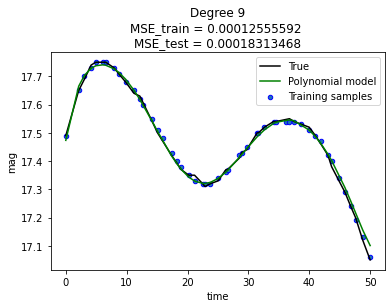

In [78]:
#Loading the data
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE_TRUE = 'DS-5-1-GAP-1-1-N-1_v2.csv'
FILE_NOISE1 = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

#Reading True data
d_true = pd.read_csv(DATA_PATH + FILE_TRUE,header=None)
#Reading Noise1 data
d_noise1 = pd.read_csv(DATA_PATH + FILE_NOISE1,header=None)
#Reading Noise2 data
d_noise2 = pd.read_csv(DATA_PATH + FILE_NOISE2,header=None)

#polynomial degree
degree = 9
#model = make_pipeline(PolynomialFeatures(degree), Ridge())
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#DATA_PATH_NOISE1 = DS-5-1-GAP-0-1-N-0_v2.csv'
X = d_noise1[0]  #time
x = X[:, np.newaxis]
Y = d_noise1[1]  #mag_A
y = Y[:, np.newaxis]

X_test = d_true[0]
Y_test = d_true[1]

#Training
model.fit(x, y)  #get polynomial model for training data

x_test = X_test[:, np.newaxis]
y_test = Y_test[:, np.newaxis]

#Testing
y_pred_train = model.predict(x) 
y_pred_test = model.predict(x_test)


MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE train ",MSE_train)
print("MSE test ",MSE_test)


import matplotlib.pyplot as plt
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()





MSE train  0.002299996622951471
MSE test  0.0018304579259541404


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


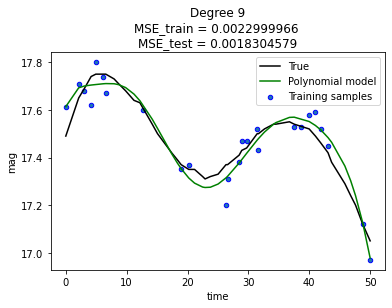

In [35]:
# DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
X = d_noise2[0]  #time
x = X[:, np.newaxis]
Y = d_noise2[1]  #mag_A
y = Y[:, np.newaxis]

#Training
model.fit(x, y)  #get polynomial model for training data

#Testing
y_pred_train = model.predict(x) 
y_pred_test = model.predict(x_test)


MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE train ",MSE_train)
print("MSE test ",MSE_test)


import matplotlib.pyplot as plt
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

#Conclusions for file DS-5-1-GAP-1-1-N-1_v2.csv
- I follow the same teqnique as the past example, that was writing values from 10 to 10.
- Once the polynomial model was closer to the true function I started to add +1 to the Polynomial degree.
- For this case both plots are quite equal so **the best fitting degree is 9**

# Get the best polynomial model for the following time series: DS-5-1-GAP-5-1-N-3_v2.csv  (noise: 0.466%)

Nonlinear datasets:  DS-5-1-GAP-1-1-N-1  and DS-5-1-GAP-5-1-N-3. Each dataset contains 201 columns, first column has the time, second column A1, third column A2, forth column A3, fifth column A4, and so on, use A1, A2,....A100

MSE train  0.001204585451223339
MSE test  0.0036626050104805047


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


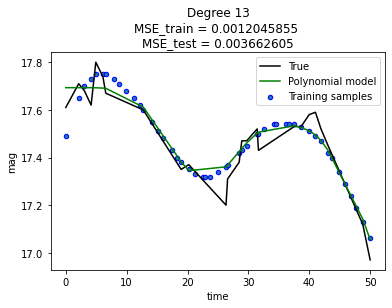

In [71]:
#Loading the data
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE_TRUE = 'DS-5-1-GAP-5-1-N-3_v2.csv'
FILE_NOISE1 = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE_NOISE2 = 'DS-5-1-GAP-1-1-N-1_v2.csv'

#Reading True data
d_true = pd.read_csv(DATA_PATH + FILE_TRUE,header=None)
#Reading Noise1 data
d_noise1 = pd.read_csv(DATA_PATH + FILE_NOISE1,header=None)
#Reading Noise2 data
d_noise2 = pd.read_csv(DATA_PATH + FILE_NOISE2,header=None)

#polynomial degree
degree = 13
#model = make_pipeline(PolynomialFeatures(degree), Ridge())
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#DATA_PATH_NOISE1 = DS-5-1-GAP-0-1-N-0_v2.csv
X = d_noise1[0]  #time
x = X[:, np.newaxis]
Y = d_noise1[1]  #mag_A
y = Y[:, np.newaxis]

X_test = d_true[0]
Y_test = d_true[1]

#Training
model.fit(x, y)  #get polynomial model for training data

x_test = X_test[:, np.newaxis]
y_test = Y_test[:, np.newaxis]

#Testing
y_pred_train = model.predict(x) 
y_pred_test = model.predict(x_test)


MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE train ",MSE_train)
print("MSE test ",MSE_test)


import matplotlib.pyplot as plt
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

MSE train  0.0014260568932116502
MSE test  0.0035732859302792744


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


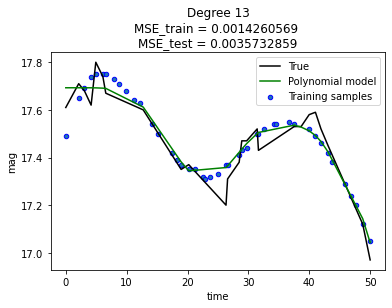

In [72]:
# DATA_PATH_NOISE2 = DS-5-1-GAP-1-1-N-1_v2.csv
X = d_noise2[0]  #time
x = X[:, np.newaxis]
Y = d_noise2[1]  #mag_A
y = Y[:, np.newaxis]

#Training
model.fit(x, y)  #get polynomial model for training data

#Testing
y_pred_train = model.predict(x) 
y_pred_test = model.predict(x_test)


MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE train ",MSE_train)
print("MSE test ",MSE_test)


import matplotlib.pyplot as plt
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

#Conclusions for file DS-5-1-GAP-5-1-N-3_v2.csv
- I use the same technique as the past exampel, that was writing values from 10 to 10.
- Once the polynomial model was closer to the true function I started to add +1 to the Polynomial degree.
- For this case was a little bit difficult to find the Best fitting because the shape of the true plot and because most pf the values that I tested demonstrated overfitting, **but the degree that was more closer to the truth (True value or BIAS) was 13**

#Measure the Mean Squared Error (MSE) on true data DS-5-1-GAP-0-1-N-0_v2.csv  and also on observed data (noisy training data).
Nonlinear datasets: DS-5-1-GAP-1-1-N-1 and DS-5-1-GAP-5-1-N-3. Each dataset contains 201 columns, first column has the time, second column A1, third column A2, forth column A3, fifth column A4, and so on, use A1, A2,....A100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


MSE train  7.908688665959731e-05
MSE test  8.198052628014606e-05


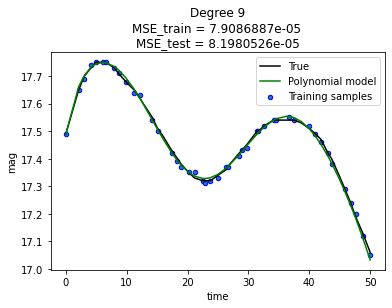

In [74]:
#Loading the data
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/ArtificialData/'
FILE_TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
FILE_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
FILE_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

#Reading True data
d_true = pd.read_csv(DATA_PATH + FILE_TRUE,header=None)
#Reading Noise1 data
d_noise1 = pd.read_csv(DATA_PATH + FILE_NOISE1,header=None)
#Reading Noise2 data
d_noise2 = pd.read_csv(DATA_PATH + FILE_NOISE2,header=None)

#polynomial degree
degree = 9
#model = make_pipeline(PolynomialFeatures(degree), Ridge())
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#DATA_PATH_NOISE1 = DS-5-1-GAP-1-1-N-1_v2.csv
X = d_noise1[0]  #time
x = X[:, np.newaxis]
Y = d_noise1[1]  #mag_A
y = Y[:, np.newaxis]

X_test = d_true[0]
Y_test = d_true[1]

#Training
model.fit(x, y)  #get polynomial model for training data

x_test = X_test[:, np.newaxis]
y_test = Y_test[:, np.newaxis]

#Testing
y_pred_train = model.predict(x) 
y_pred_test = model.predict(x_test)


MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE train ",MSE_train)
print("MSE test ",MSE_test)


import matplotlib.pyplot as plt
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

MSE train  0.002299996622951471
MSE test  0.0017882210509786724


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


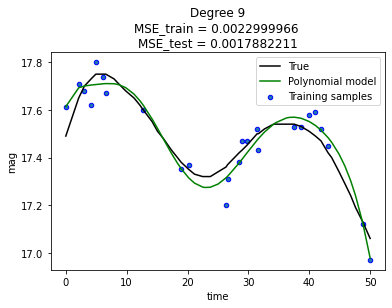

In [75]:
# DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
X = d_noise2[0]  #time
x = X[:, np.newaxis]
Y = d_noise2[1]  #mag_A
y = Y[:, np.newaxis]

#Training
model.fit(x, y)  #get polynomial model for training data

#Testing
y_pred_train = model.predict(x) 
y_pred_test = model.predict(x_test)


MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE train ",MSE_train)
print("MSE test ",MSE_test)


import matplotlib.pyplot as plt
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()

#Conclusions for file DS-5-1-GAP-0-1-N-0_v2.cv
- I use the same technique as the past exampel, that was writing values from 10 to 10.
- Once the polynomial model was closer to the true function I started to add +1 to the Polynomial degree.
- In this case the plot was similar as the first example, but wasn't the same, because it has different behavior with the degrees that I tested, **for this case the best fitting degree was 9**
##General conclusion
I found interesting this activity, I learned how to calculate the MSE and what was more important is that I learned the different ways that the non-linear data works (Ground Truth, Noisy level 1 and Noisy level 2) this part I learned it playing with the different values that I wrote on the Polynomial degree.
